In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import sklearn
#import imblearn

In [2]:
# Fetching the data
data = pd.read_csv(r"C:\Users\Rushikesh\Desktop\Capstone Project\587_cap_proj_dataset_v1.0\train(1).csv")
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
# Checking the datatypes of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [4]:
# As -1 represents the null value here so replacing -1 with NaN
data_copied = data.copy()
data_unbalance = data.copy()
data_without_encoding = data.copy()

data_copied.replace(-1, np.nan, inplace=True)

In [5]:
# Checking the null values
data_copied.isna().sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          0
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


<AxesSubplot:>

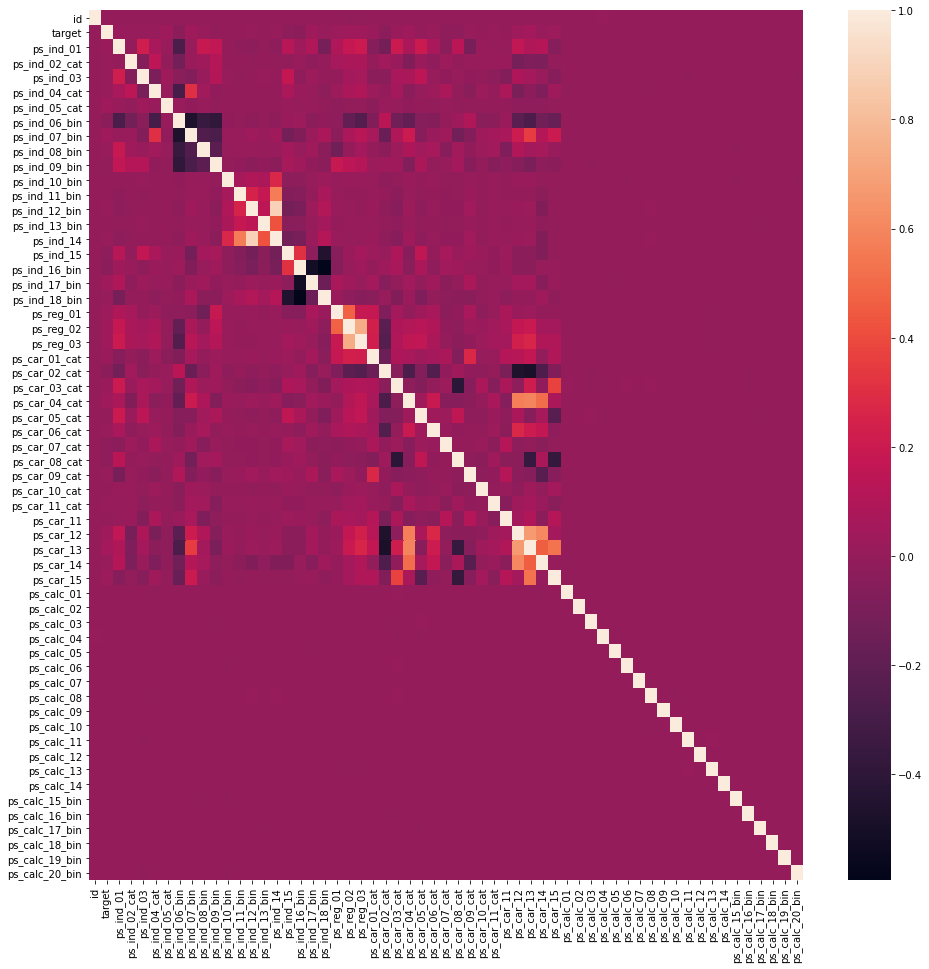

In [6]:
plt.figure(figsize=(16,16))
sns.heatmap(data_copied.corr())

In [7]:
data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Checking the distribution of values in the target column
data['target'].value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [9]:
# Let's divide the features into- Binary, Categorical, Continuous, Ordinal
bina = []
cat = []
cont = []
ordi = []

column_names = list(data.columns)

for col in column_names:
    if col[-3:] == 'cat' or col == 'id':
        cat.append(col)
        
    elif col[-3:] == 'bin' or col == 'target':
        bina.append(col)
        
    elif data[col].dtype == 'int64':
        ordi.append(col)
        
    elif data[col].dtype == 'float64':
        cont.append(col)

In [10]:
features_division = {'Binary': len(bina), 'Categorical': len(cat), 'Continuous': len(cont), 'Ordinal': len(ordi)}
features_division

{'Binary': 18, 'Categorical': 15, 'Continuous': 10, 'Ordinal': 16}

In [11]:
features_division['Categorical']

15

In [12]:
features_division['Binary']

18

In [13]:
df_interval = data[cont]
df_interval.head()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
0,0.7,0.2,0.718070,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2
1,0.8,0.4,0.766078,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3
2,0.0,0.0,-1.000000,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1
3,0.9,0.2,0.580948,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1
4,0.7,0.6,0.840759,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0


In [14]:
df_interval.describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


<AxesSubplot:>

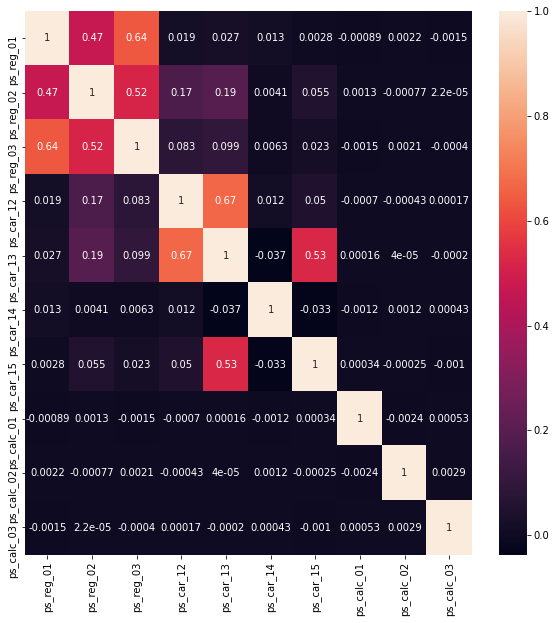

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df_interval.corr(), annot=True)

In [16]:
df_ordinal = data[ordi]
df_ordinal.head()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
0,2,5,0,11,2,3,1,10,1,10,1,5,9,1,5,8
1,1,7,0,3,3,2,1,9,5,8,1,7,3,1,1,9
2,5,9,0,12,1,2,2,9,1,8,2,7,4,2,7,7
3,0,2,0,8,1,2,4,7,1,8,4,2,2,2,4,9
4,0,0,0,9,3,2,2,6,3,10,2,12,3,1,1,3


In [17]:
df_ordinal.describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


<AxesSubplot:>

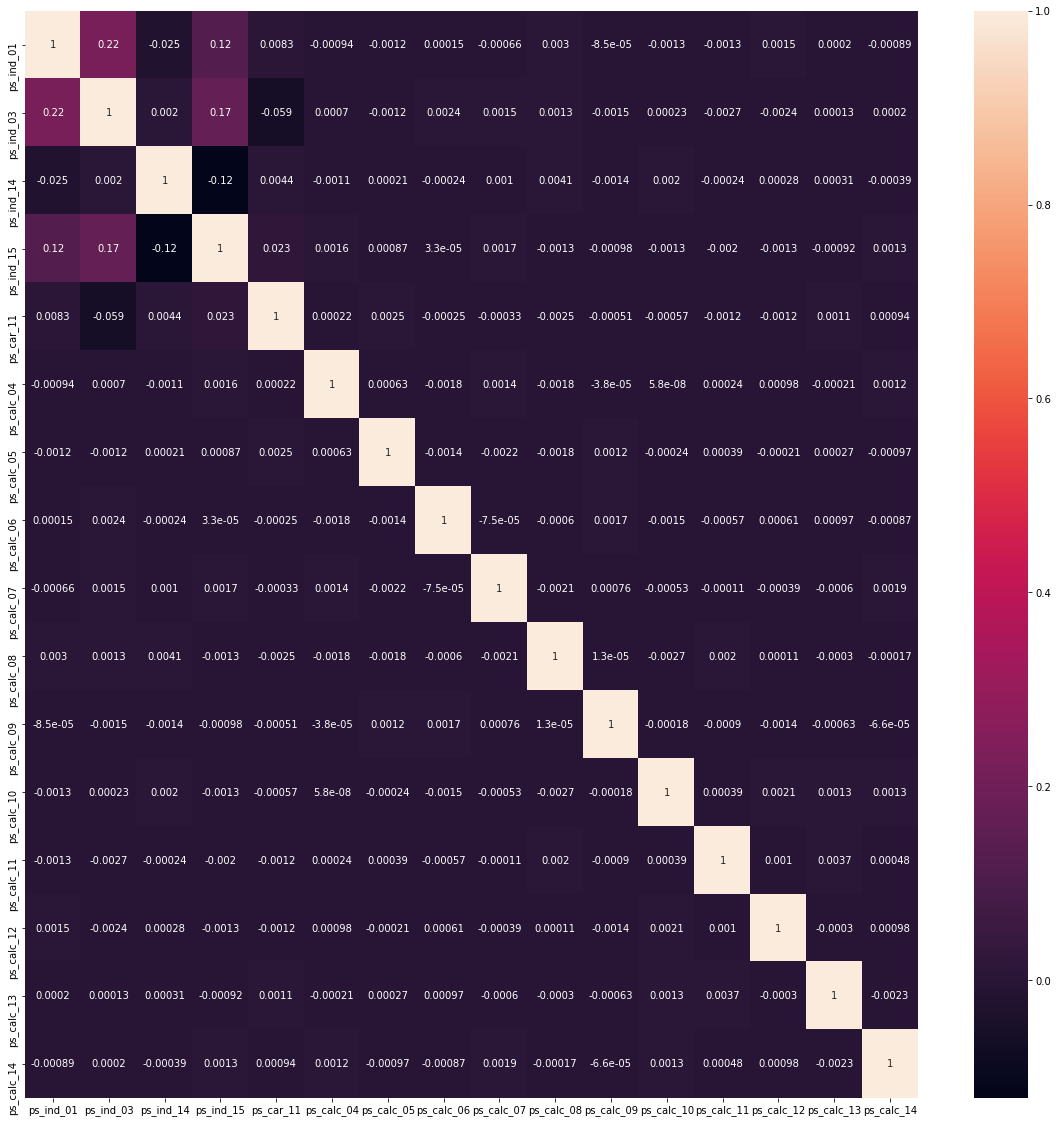

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(df_ordinal.corr(), annot= True,fmt='.2g')

In [19]:
df_binary = data[bina]
df_binary.head()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0
2,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0
3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0


<AxesSubplot:>

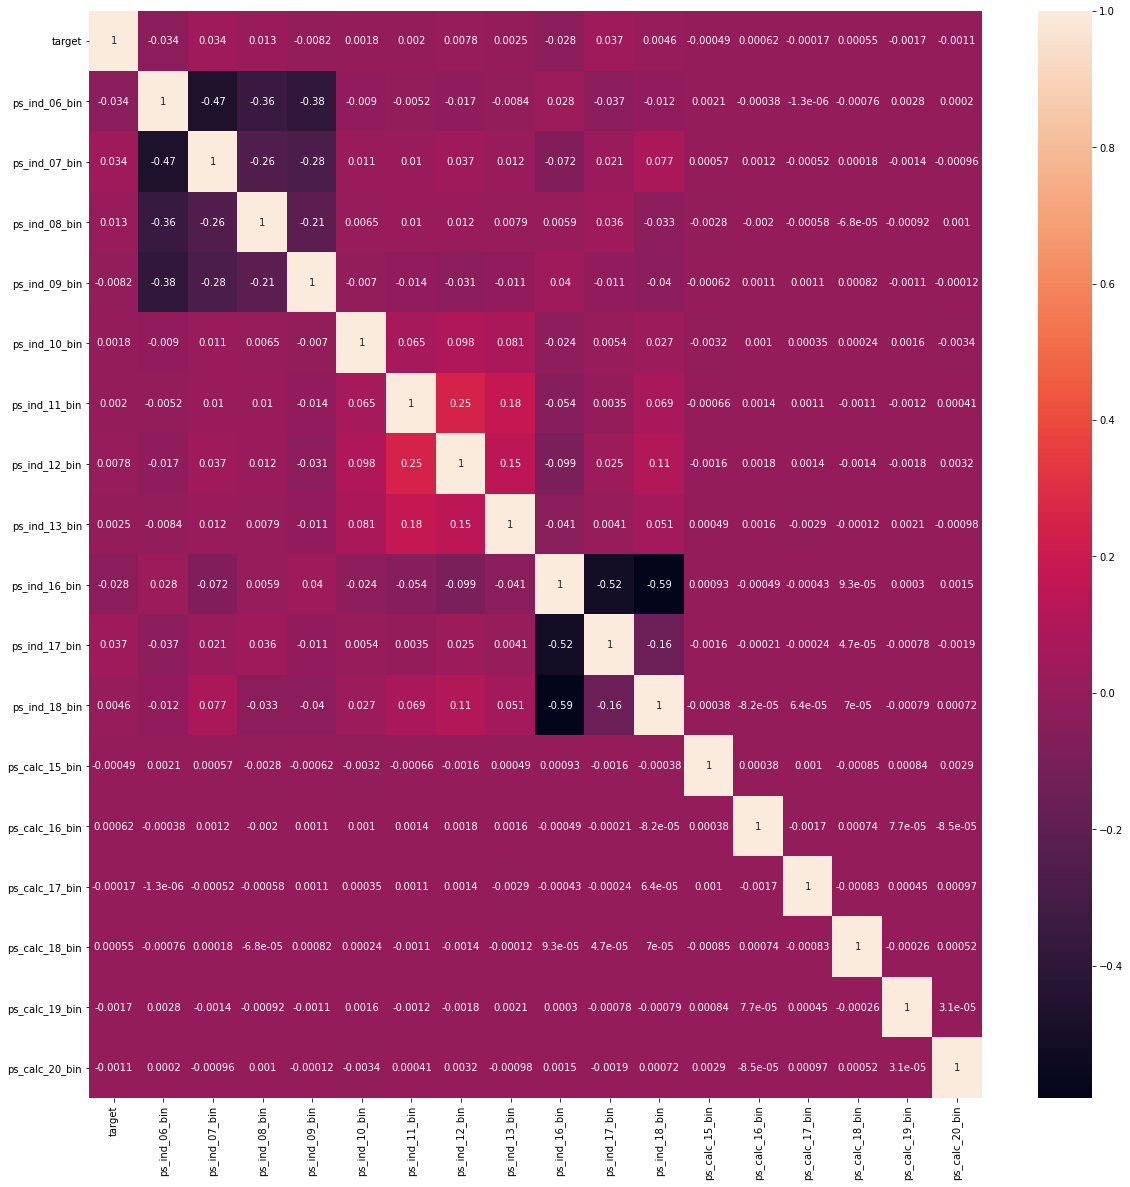

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df_binary.corr(), annot= True)

In [21]:
counts = data['target'].value_counts()
counts

0    573518
1     21694
Name: target, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

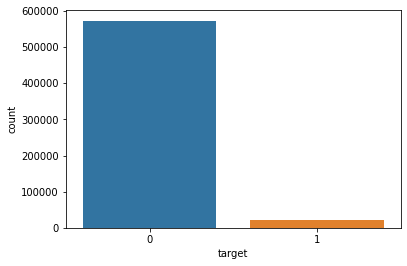

In [22]:
sns.countplot(data['target'])

In [23]:
percentage_of_zero = counts[0]/len(data['target']) * 100
percentage_of_zero

96.3552482140817

In [24]:
percentage_of_one = 100-percentage_of_zero
percentage_of_one

3.6447517859183023

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
smote_obj = SMOTE(random_state=23)

In [27]:
x_b = data.drop(['target'], axis=1)
y_b = data['target']

In [28]:
x_smote, y_smote = smote_obj.fit_resample(x_b, y_b)

In [29]:
type(x_smote)

pandas.core.frame.DataFrame

In [30]:
x_smote

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,9,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,13,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,16,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147031,1047738,0,3,4,0,0,0,0,0,0,...,3,0,1,10,0,0,0,0,0,0
1147032,1429536,2,1,2,0,0,0,0,0,0,...,7,1,3,7,0,1,1,0,0,0
1147033,1409374,2,2,4,0,0,0,1,0,0,...,5,0,4,11,0,0,0,0,0,0
1147034,911995,1,1,1,0,0,1,0,0,0,...,5,2,3,8,0,1,0,0,0,0


In [31]:
x_smote.shape, y_smote.shape

((1147036, 58), (1147036,))

In [32]:
col = list(data.columns)
col.remove('target')
col

['id',
 'ps_ind_01',
 'ps_ind_02_cat',
 'ps_ind_03',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

In [33]:
x_smote.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,9,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,13,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,16,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [34]:
#x_smote=pd.DataFrame(x_smote, columns=col)
#x_smote.head()

In [35]:
y_smote.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [36]:
y_smote = pd.DataFrame(y_smote, columns=['target'])
y_smote.head()

,target
0,0
1,0
2,0
3,0
4,0


In [37]:
zero = y_smote[y_smote['target']==0].count()
ones = y_smote[y_smote['target']==1].count()

In [38]:
zero

target    573518
dtype: int64

In [39]:
ones

target    573518
dtype: int64

In [40]:
data_copied = pd.concat([x_smote, y_smote], axis=1)
data_copied.columns

Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin', 'target'],


In [41]:
len(data_copied.columns)

59

In [42]:
smote_ratio = SMOTE(sampling_strategy=0.12)

In [43]:
x_s, y_s = smote_ratio.fit_resample(x_b, y_b)

In [44]:
type(x_s)

pandas.core.frame.DataFrame

In [45]:
x_s.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,9,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,13,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,16,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [46]:
#x_s=pd.DataFrame(x_s, columns=col)
#x_s.head()

In [47]:
type(y_s)

pandas.core.series.Series

In [48]:
y_s = pd.DataFrame(y_s, columns=['target'])
y_s.head()

,target
0,0
1,0
2,0
3,0
4,0


In [49]:
zero = y_smote[y_smote['target']==0].count()
ones = y_smote[y_smote['target']==1].count()

In [50]:
zero

target    573518
dtype: int64

In [51]:
ones

target    573518
dtype: int64

In [52]:
x_s.shape

(642340, 58)

In [53]:
y_s.shape

(642340, 1)

In [54]:
data_copied = pd.concat([x_s, y_s], axis=1)
data_copied.columns

Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin', 'target'],


In [55]:
data_copied.describe()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
count,6.423400e+05,642340.000000,642340.000000,642340.000000,642340.000000,642340.000000,642340.000000,642340.000000,642340.000000,642340.000000,...,642340.000000,642340.000000,642340.000000,642340.000000,642340.000000,642340.000000,642340.000000,642340.000000,642340.000000,642340.000000
mean,7.440096e+05,1.884396,1.343846,4.399735,0.400441,0.411662,0.371886,0.246206,0.154591,0.173688,...,1.413479,2.842091,7.509180,0.114461,0.610814,0.536046,0.271982,0.331994,0.143785,0.107143
std,4.294233e+05,1.960537,0.652097,2.671540,0.490252,1.338903,0.483308,0.430800,0.361515,0.378842,...,1.189612,1.675346,2.714341,0.318371,0.487566,0.498699,0.444981,0.470929,0.350872,0.309295
min,7.000000e+00,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.721568e+05,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.436780e+05,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.115962e+06,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.488027e+06,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
# Replacing -1 with null in data_copied
data_copied.replace(-1, np.nan, inplace=True)

In [57]:
data_copied.shape, data_unbalance.shape, data_without_encoding.shape

((642340, 59), (595212, 59), (595212, 59))

In [58]:
# Replacing -1 with null in data_unbalance and data_without_encoding
data_unbalance.replace(-1, np.nan, inplace=True)
data_without_encoding.replace(-1, np.nan, inplace=True)

In [59]:
data_copied.isna().sum()

id                     0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5839
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         108698
ps_car_01_cat        107
ps_car_02_cat          0
ps_car_03_cat     429231
ps_car_04_cat          0
ps_car_05_cat     273687
ps_car_06_cat          0
ps_car_07_cat      11577
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42885
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


In [60]:
missing_values_columns = []
count=0
for i in data_copied.columns:
    if data_copied[i].isna().sum() > 0:
        missing_values_columns.append(i)
        number = data_copied[i].isna().sum()/ len(data_copied[i])
        print("The column {} is having {} percent of missing values.".format(i, number*100))
        count+=1

The column ps_ind_02_cat is having 0.03362705109443597 percent of missing values.
The column ps_ind_04_cat is having 0.012921505744621229 percent of missing values.
The column ps_ind_05_cat is having 0.9090201450944981 percent of missing values.
The column ps_reg_03 is having 16.922190740106487 percent of missing values.
The column ps_car_01_cat is having 0.01665784475511411 percent of missing values.
The column ps_car_03_cat is having 66.82302207553631 percent of missing values.
The column ps_car_05_cat is having 42.607808948531925 percent of missing values.
The column ps_car_07_cat is having 1.8023165301865054 percent of missing values.
The column ps_car_09_cat is having 0.08858237070710216 percent of missing values.
The column ps_car_11 is having 0.0007784039605193511 percent of missing values.
The column ps_car_12 is having 0.00015568079210387023 percent of missing values.
The column ps_car_14 is having 6.676370769374475 percent of missing values.


In [61]:
print("Total number of missing values features are: %d"%(len(missing_values_columns)))

Total number of missing values features are: 12


In [62]:
missing_values_columns

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_03_cat',
 'ps_car_05_cat',
 'ps_car_07_cat',
 'ps_car_09_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_14']

In [63]:
# Dropping the feature columns ps_car_05_cat and ps_car_03_cat from data_copied
data_copied.drop(["ps_car_05_cat" , "ps_car_03_cat"], axis=1, inplace=True)
missing_values_columns.remove("ps_car_05_cat")
missing_values_columns.remove("ps_car_03_cat")
missing_values_columns

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_07_cat',
 'ps_car_09_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_14']

In [64]:
# Dropping the feature columns ps_car_05_cat and ps_car_03_cat from data_unbalance and data_without_encoding
data_unbalance.drop(["ps_car_05_cat" , "ps_car_03_cat"], axis=1, inplace=True)
data_without_encoding.drop(["ps_car_05_cat" , "ps_car_03_cat"], axis=1, inplace=True)

In [65]:
# Removing "ps_car_05_cat" , "ps_car_03_cat" from cat list
cat.remove("ps_car_05_cat")
cat.remove("ps_car_03_cat")
cat

['id',
 'ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [66]:
# Treating other missing values columns of data_copied
for col in missing_values_columns:
    if col[-3:] == 'cat':
        data_copied[col].fillna(data_copied[col].mode()[0], inplace=True)  # Treating categorical columns
        
    elif data_copied[col].dtype == 'int64':
        data_copied[col].fillna(data_copied[col].mode()[0], inplace=True)  # Treating ordinal columns
        
    elif data_copied[col].dtype == 'float64':
        data_copied[col].fillna(data_copied[col].mean(), inplace=True)       # Treating continuous columns

In [67]:
# Treating other missing values columns of data_unbalance
for col in missing_values_columns:
    if col[-3:] == 'cat':
        data_unbalance[col].fillna(data_unbalance[col].mode()[0], inplace=True)  # Treating categorical columns
        
    elif data_unbalance[col].dtype == 'int64':
        data_unbalance[col].fillna(data_unbalance[col].mode()[0], inplace=True)  # Treating ordinal columns
        
    elif data_unbalance[col].dtype == 'float64':
        data_unbalance[col].fillna(data_unbalance[col].mean(), inplace=True)       # Treating continuous columns

In [68]:
data_unbalance.isna().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_04_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0
ps_calc_13        0


In [69]:
# Treating other missing values columns of data_without_encoding
for col in missing_values_columns:
    if col[-3:] == 'cat':
        data_without_encoding[col].fillna(data_without_encoding[col].mode()[0], inplace=True)  # Treating categorical columns
        
    elif data_without_encoding[col].dtype == 'int64':
        data_without_encoding[col].fillna(data_without_encoding[col].mode()[0], inplace=True)  # Treating ordinal columns
        
    elif data_without_encoding[col].dtype == 'float64':
        data_without_encoding[col].fillna(data_without_encoding[col].mean(), inplace=True)       # Treating continuous columns

In [70]:
data_without_encoding.isna().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_04_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0
ps_calc_13        0


In [71]:
# Checking the number of null values in our dataset
number_of_columns_with_missingvalues = 0
for i in data_copied.isna().sum():
    if i>0:
        number_of_columns_with_missingvalues += 1
        
number_of_columns_with_missingvalues

0

<AxesSubplot:>

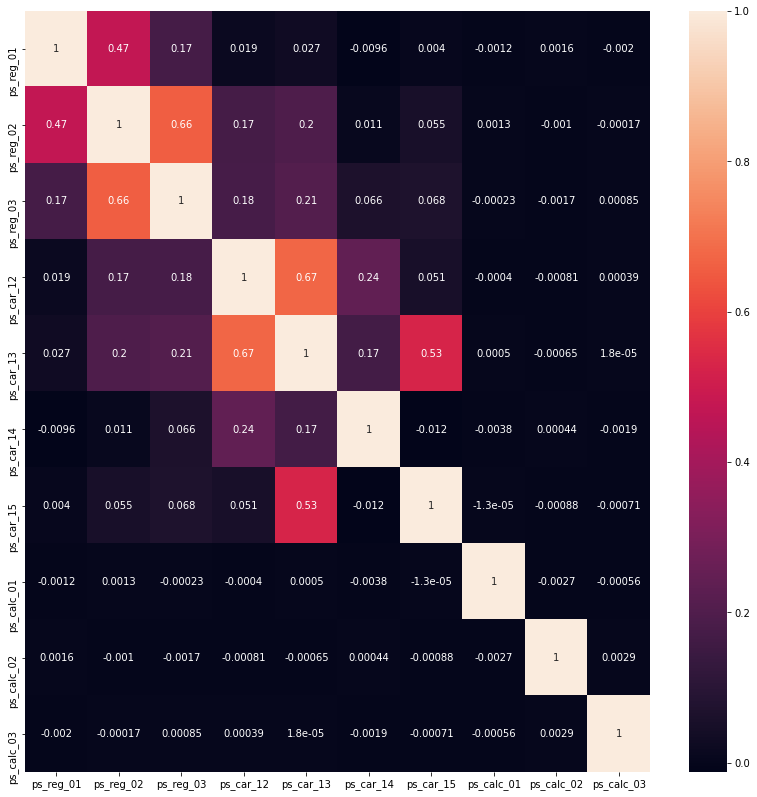

In [72]:
plt.figure(figsize=(14,14))
sns.heatmap(data_copied[cont].corr(), annot=True)

<AxesSubplot:>

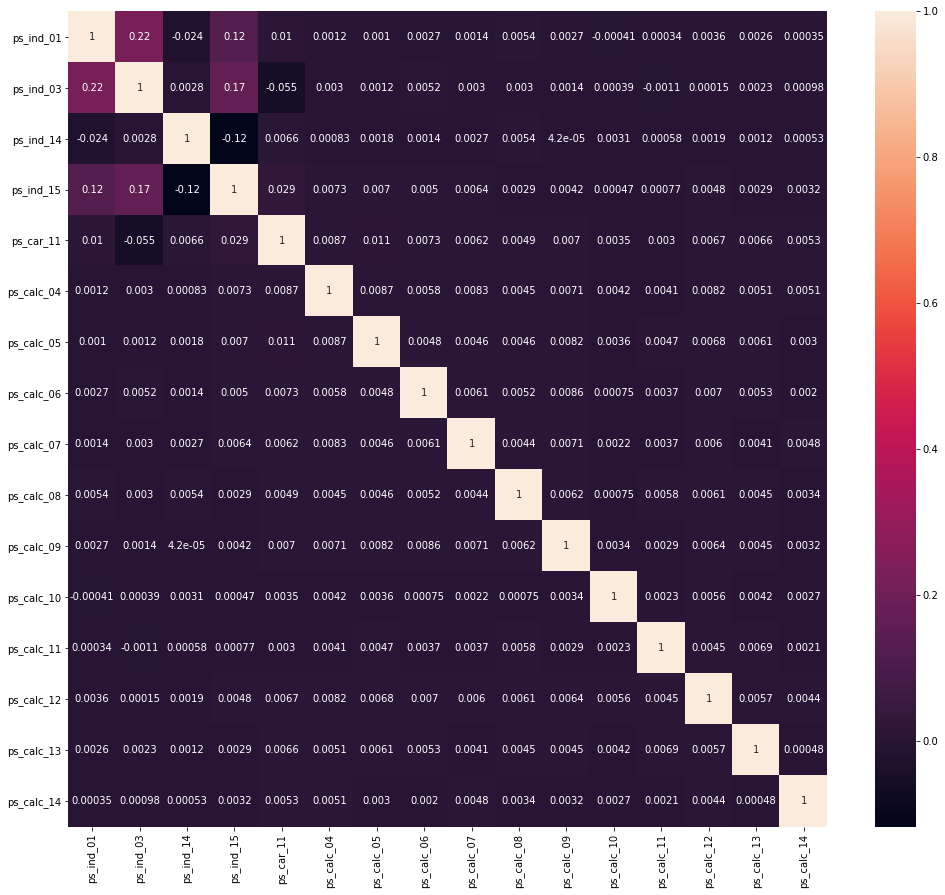

In [73]:
plt.figure(figsize=(17,15))
sns.heatmap(data_copied[ordi].corr(), annot=True)

In [74]:

# Checking the categorical features
cat

['id',
 'ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [75]:
cat_value_count = {}

for col in cat:
    cat_value_count[col] = data_copied[col].value_counts().count()
    
cat_value_count

{'id': 621719,
 'ps_ind_02_cat': 5,
 'ps_ind_04_cat': 2,
 'ps_ind_05_cat': 7,
 'ps_car_01_cat': 12,
 'ps_car_02_cat': 2,
 'ps_car_04_cat': 10,
 'ps_car_06_cat': 18,
 'ps_car_07_cat': 2,
 'ps_car_08_cat': 2,
 'ps_car_09_cat': 5,
 'ps_car_10_cat': 3,
 'ps_car_11_cat': 104}

In [76]:
data_copied.shape

(642340, 57)

In [77]:
data_copied.drop(['id'], axis=1, inplace=True)
data_unbalance.drop(['id'], axis=1, inplace=True)
data_without_encoding.drop(['id'], axis=1, inplace=True)

In [78]:
data_copied.shape, data_unbalance.shape, data_without_encoding.shape

((642340, 56), (595212, 56), (595212, 56))

In [79]:
# Removing "id" feature from cat list
cat.remove("id")
cat

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [80]:
cat.remove('ps_car_11_cat')

In [81]:
cat

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat']

In [82]:
before_encoding_balanced = data_copied.copy()
before_encoding_balanced.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
0,2,2.0,5,1.0,0.0,0,1,0,0,0,...,1,5,8,0,1,1,0,0,1,0
1,1,1.0,7,0.0,0.0,0,0,1,0,0,...,1,1,9,0,1,1,0,1,0,0
2,5,4.0,9,1.0,0.0,0,0,1,0,0,...,2,7,7,0,1,1,0,1,0,0
3,0,1.0,2,0.0,0.0,1,0,0,0,0,...,2,4,9,0,0,0,0,0,0,0
4,0,2.0,0,1.0,0.0,1,0,0,0,0,...,1,1,3,0,0,0,1,1,0,0


In [83]:
# Applying get_dummies over categorical columns
dummy_df = pd.get_dummies(data_copied, columns=cat, drop_first=True)
dummy_df.head()

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,...,ps_car_06_cat_16,ps_car_06_cat_17,ps_car_07_cat_1.0,ps_car_08_cat_1,ps_car_09_cat_1.0,ps_car_09_cat_2.0,ps_car_09_cat_3.0,ps_car_09_cat_4.0,ps_car_10_cat_1,ps_car_10_cat_2
0,2,5,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,7,0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0
2,5,9,0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0
3,0,2,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0


In [84]:

# Checking the shape of dummy_df
dummy_df.shape

(642340, 102)

In [85]:
print("Number of features before applying get_dummies are: %d"%data_copied.shape[1])
print("Number of features after applying get_dummies are: %d"%dummy_df.shape[1])

Number of features before applying get_dummies are: 56
Number of features after applying get_dummies are: 102


In [86]:
# Columns present in dummy_df
columns_after_dummy = list(dummy_df.columns)
columns_after_dummy

['ps_ind_01',
 'ps_ind_03',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_11_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin',
 'target',
 'ps_ind_02_cat_1.0',
 'ps_ind_02_cat_2.0',
 'ps_ind_02_cat_3.0',
 'ps_ind_02_cat_4.0',
 'ps_ind_04_cat_1.0',
 'ps_ind_05_cat_1.0',
 'ps_ind_05_cat_2.0',
 'ps_ind_05_cat_3.0',
 'ps_ind_05_cat_4.0',
 'ps_ind_05_cat_5.0',
 'ps_ind_05_cat_6.0',
 'ps_car_01_cat_1.0',
 'ps_car_01_cat_2

In [87]:

final_col = [i for i in columns_after_dummy if 'calc' not in i]
len(final_col)

82

In [88]:
df_with_outliers = dummy_df[final_col]
df_with_outliers.shape

(642340, 82)

### Removing the outliers from the continuous features

In [89]:
overall_outliers = []
for i in final_col:
    if df_with_outliers[i].dtype == 'float64':
        # Calculating the first quartile
        q1 = np.percentile(df_with_outliers[i], 25)
        # Calculating the third quartile
        q3 = np.percentile(df_with_outliers[i], 75)
        # IQR- Inter quartile range:
        iqr = (q3-q1)*1.5
        
        outliers = df_with_outliers[(df_with_outliers[i]<q1-iqr) | (df_with_outliers[i]>q3+iqr)].index.values
        print("The feature {} has {} outliers".format(i, len(outliers)))
        overall_outliers.extend(outliers)

The feature ps_reg_01 has 0 outliers
The feature ps_reg_02 has 39460 outliers
The feature ps_reg_03 has 41595 outliers
The feature ps_car_11 has 28404 outliers
The feature ps_car_12 has 13128 outliers
The feature ps_car_13 has 28482 outliers
The feature ps_car_14 has 29469 outliers
The feature ps_car_15 has 28552 outliers


In [90]:
len(overall_outliers)

209090

In [91]:
common_rows =  list((Counter(overall_outliers) - Counter(set(overall_outliers))).keys())
len(common_rows)

45438

In [92]:
# Removing outliers rows:
df_after_outliers = df_with_outliers.drop(index=common_rows, axis=0)
print("The shape after outliers removal is {}".format(df_after_outliers.shape))

The shape after outliers removal is (596902, 82)


In [93]:
df_after_outliers = df_after_outliers.reset_index(drop=True)

In [94]:
df_after_outliers.shape

(596902, 82)

In [95]:
# Removing outliers from 
#before_encoding_balanced
overall_outliers1 = []
for i in before_encoding_balanced.columns:
    if before_encoding_balanced[i].dtype == 'float64':
        # Calculating the first quartile
        q1 = np.percentile(before_encoding_balanced[i], 25)
        # Calculating the third quartile
        q3 = np.percentile(before_encoding_balanced[i], 75)
        # IQR- Inter quartile range:
        iqr = (q3-q1)*1.5
        
        outliers = before_encoding_balanced[(before_encoding_balanced[i]<q1-iqr) | (before_encoding_balanced[i]>q3+iqr)].index.values
        print("The feature {} has {} outliers".format(i, len(outliers)))
        overall_outliers1.extend(outliers)        

print("\n\n==========================================\n\n\n\n")

#data_unbalance
overall_outliers2 = []
for i in data_unbalance.columns:
    if data_unbalance[i].dtype == 'float64':
        # Calculating the first quartile
        q1 = np.percentile(data_unbalance[i], 25)
        # Calculating the third quartile
        q3 = np.percentile(data_unbalance[i], 75)
        # IQR- Inter quartile range:
        iqr = (q3-q1)*1.5
        
        outliers = data_unbalance[(data_unbalance[i]<q1-iqr) | (data_unbalance[i]>q3+iqr)].index.values
        print("The feature {} has {} outliers".format(i, len(outliers)))
        overall_outliers2.extend(outliers)        

print("===============================\n\n\n\n")

#data_without_encoding
overall_outliers3 = []
for i in data_without_encoding.columns:
    if data_without_encoding[i].dtype == 'float64':
        # Calculating the first quartile
        q1 = np.percentile(data_without_encoding[i], 25)
        # Calculating the third quartile
        q3 = np.percentile(data_without_encoding[i], 75)
        # IQR- Inter quartile range:
        iqr = (q3-q1)*1.5
        
        outliers = data_without_encoding[(data_without_encoding[i]<q1-iqr) | (data_without_encoding[i]>q3+iqr)].index.values
        print("The feature {} has {} outliers".format(i, len(outliers)))
        overall_outliers3.extend(outliers)

The feature ps_ind_02_cat has 11398 outliers
The feature ps_ind_04_cat has 0 outliers
The feature ps_ind_05_cat has 70620 outliers
The feature ps_reg_01 has 0 outliers
The feature ps_reg_02 has 39460 outliers
The feature ps_reg_03 has 41595 outliers
The feature ps_car_01_cat has 6074 outliers
The feature ps_car_07_cat has 40519 outliers
The feature ps_car_09_cat has 0 outliers
The feature ps_car_11 has 28404 outliers
The feature ps_car_12 has 13128 outliers
The feature ps_car_13 has 28482 outliers
The feature ps_car_14 has 29469 outliers
The feature ps_car_15 has 28552 outliers
The feature ps_calc_01 has 0 outliers
The feature ps_calc_02 has 0 outliers
The feature ps_calc_03 has 0 outliers






The feature ps_ind_02_cat has 11378 outliers
The feature ps_ind_04_cat has 0 outliers
The feature ps_ind_05_cat has 61394 outliers
The feature ps_reg_01 has 0 outliers
The feature ps_reg_02 has 36793 outliers
The feature ps_reg_03 has 35514 outliers
The feature ps_car_01_cat has 5904 outliers
T

In [96]:
# Common rows for:
#before_encoding_balanced
common_rows1 =  list((Counter(overall_outliers1) - Counter(set(overall_outliers1))).keys())
print(len(common_rows1))

print("\n\n==============\n\n")


#data_unbalance
common_rows2 =  list((Counter(overall_outliers2) - Counter(set(overall_outliers2))).keys())
print(len(common_rows2))

print("\n\n==============\n\n")



#data_without_encoding
common_rows3 =  list((Counter(overall_outliers3) - Counter(set(overall_outliers3))).keys())
print(len(common_rows3))

75101




68277




68277


In [97]:
# Removing outliers rows from:
#before_encoding_balanced
before_encoding_balanced.drop(index=common_rows1, axis=0, inplace=True)
print("The shape after outliers removal is {}".format(before_encoding_balanced.shape))


#data_unbalance
data_unbalance.drop(index=common_rows2, axis=0, inplace=True)
print("The shape after outliers removal is {}".format(data_unbalance.shape))


#data_without_encoding
data_without_encoding.drop(index=common_rows3, axis=0, inplace=True)
print("The shape after outliers removal is {}".format(data_without_encoding.shape))

The shape after outliers removal is (567239, 56)
The shape after outliers removal is (526935, 56)
The shape after outliers removal is (526935, 56)


In [98]:
# Resetting index of:
#before_encoding_balanced
before_encoding_balanced = before_encoding_balanced.reset_index(drop=True)
print(before_encoding_balanced.shape)

print("==================================")

#data_unbalance
data_unbalance = data_unbalance.reset_index(drop=True)
print(data_unbalance.shape)

print("==================================")

#data_without_encoding
data_without_encoding = data_without_encoding.reset_index(drop=True)
print(data_without_encoding.shape)

(567239, 56)
(526935, 56)
(526935, 56)


### Removing features with low variance

In [99]:
df_after_outliers.columns

Index(['ps_ind_01', 'ps_ind_03', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12',
       'ps_car_13', 'ps_car_14', 'ps_car_15', 'target', 'ps_ind_02_cat_1.0',
       'ps_ind_02_cat_2.0', 'ps_ind_02_cat_3.0', 'ps_ind_02_cat_4.0',
       'ps_ind_04_cat_1.0', 'ps_ind_05_cat_1.0', 'ps_ind_05_cat_2.0',
       'ps_ind_05_cat_3.0', 'ps_ind_05_cat_4.0', 'ps_ind_05_cat_5.0',
       'ps_ind_05_cat_6.0', 'ps_car_01_cat_1.0', 'ps_car_01_cat_2.0',
       'ps_car_01_cat_3.0', 'ps_car_01_cat_4.0', 'ps_car_01_cat_5.0',
       'ps_car_01_cat_6.0', 'ps_car_01_cat_7.0', 'ps_car_01_cat_8.0',
       'ps_car_01_cat_9.0', 'ps_car_01_cat_10.0', 'ps_car_01_cat_11.0',
       'ps_car_02_cat_1', 'ps_car_04_cat_1', 'ps_car_04_cat_2',
       'ps_

In [100]:
from sklearn.feature_selection import VarianceThreshold

In [101]:
obj = VarianceThreshold(0.01)
obj1 = VarianceThreshold(0.01)
obj2 = VarianceThreshold(0.01)
obj3 = VarianceThreshold(0.01)

In [102]:
len(df_after_outliers.columns), len(before_encoding_balanced), len(data_unbalance), len(data_without_encoding)

(82, 567239, 526935, 526935)

In [103]:
obj.fit(df_after_outliers.drop('target', axis=1))

obj1.fit(before_encoding_balanced.drop('target', axis=1))
obj2.fit(data_unbalance.drop('target', axis=1))
obj3.fit(data_without_encoding.drop('target', axis=1))

VarianceThreshold(threshold=0.01)

In [104]:
obj.get_support()

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True,  True,  True, False, False,  True,  True, False,
       False,  True,  True,  True,  True,  True, False, False, False])

In [105]:
list(obj.get_support()).count(True)

56

In [106]:
len(obj.get_support())

81

In [107]:
type(df_after_outliers.columns)

pandas.core.indexes.base.Index

In [108]:
outl_cols = list(df_after_outliers.columns)

outl_cols1 = list(before_encoding_balanced.columns)
outl_cols2 = list(data_unbalance.columns)
outl_cols3 = list(data_without_encoding.columns)

In [109]:
outl_list = [outl_cols, outl_cols1, outl_cols2, outl_cols3]


In [110]:
for i in outl_list:
    print('target' in i)

True
True
True
True


In [111]:
# Remove 'target' feature
for i in outl_list:
    i.remove('target')

for i in outl_list:
    print('target' in i)

False
False
False
False


In [112]:
for i in outl_list:
    print(len(i))

81
55
55
55


In [113]:
# Features of low variance is removed and  we ended up with the following features
support_len = len(obj.get_support())

support_len1 = len(obj1.get_support())
support_len2 = len(obj2.get_support())
support_len3 = len(obj3.get_support())


z = [outl_cols[i] for i in range(support_len) if obj.get_support()[i]==True]

z1 = [outl_cols1[i] for i in range(support_len1) if obj.get_support()[i]==True]
z2 = [outl_cols2[i] for i in range(support_len2) if obj.get_support()[i]==True]
z3 = [outl_cols3[i] for i in range(support_len3) if obj.get_support()[i]==True]

In [114]:
len(z), len(z1), len(z2), len(z3)

(56, 40, 40, 40)

In [115]:
# Checking if 'target' in z
'target' in z, 'target' in z1, 'target' in z2, 'target' in z3

(False, False, False, False)

In [116]:
final_col = ['target'] + (list(z))

final_col1 = ['target'] + (list(z1))
final_col2 = ['target'] + (list(z2))
final_col3 = ['target'] + (list(z3))

In [117]:
df_after_variance_removal = df_after_outliers[final_col]
df_after_variance_removal.shape

(596902, 57)

In [118]:
before_encoding_balanced = before_encoding_balanced[final_col1]
data_unbalance = data_unbalance[final_col2]
data_without_encoding = data_without_encoding[final_col3]

before_encoding_balanced.shape, data_unbalance.shape, data_without_encoding.shape

((567239, 41), (526935, 41), (526935, 41))

<AxesSubplot:>

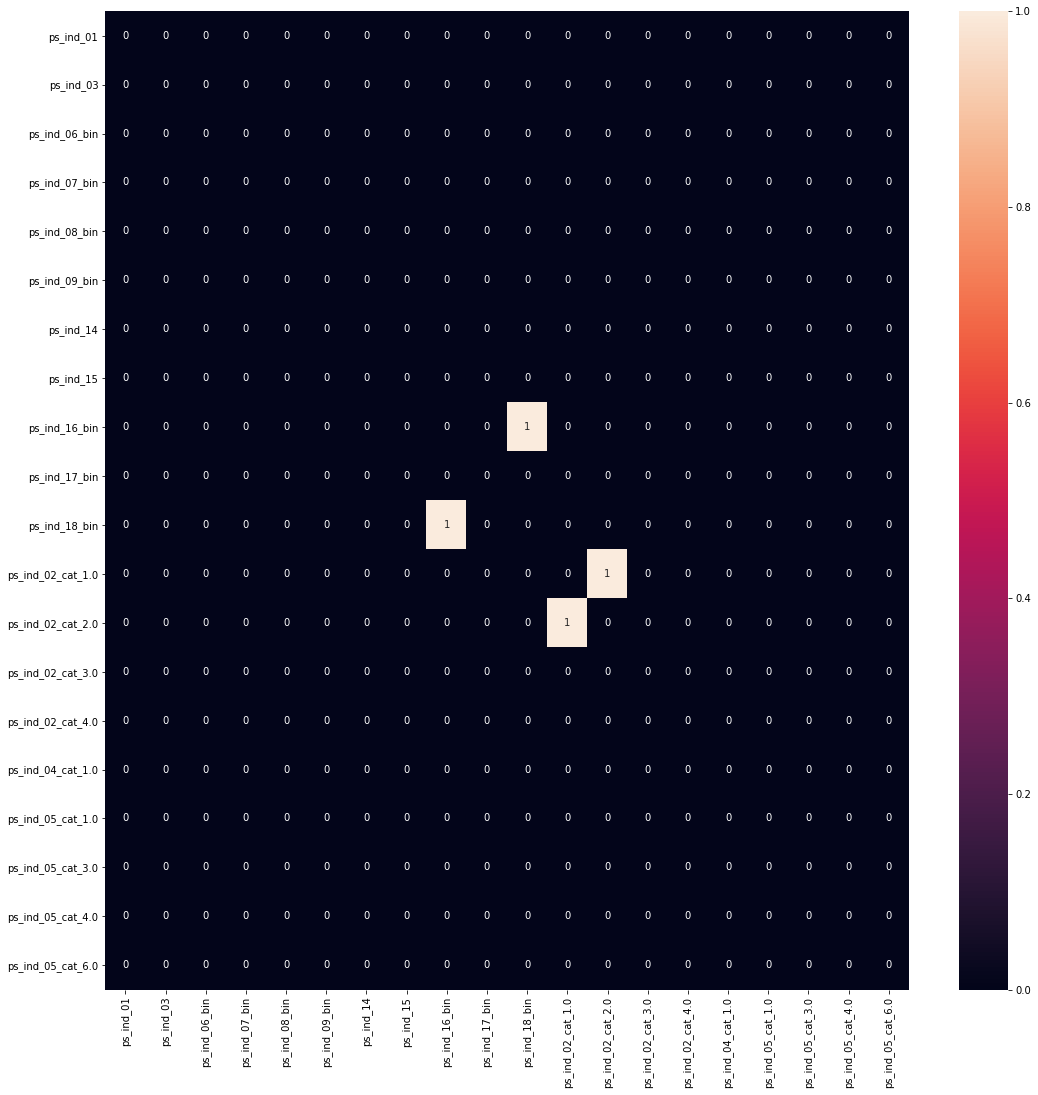

In [119]:
# Let's now find the correlation among 'ind' features
features_with_ind = [i for i in df_after_variance_removal.columns if 'ind' in i]

plt.figure(figsize=(18,18))
sns.heatmap(df_after_variance_removal[features_with_ind].corr() < -0.5 , annot=True)

### As can be seen that the features 'ps_ind_16_bin' is highly correlated with 'ps_ind_17_bin' and 'ps_ind_18_bin', so we'll remove 'ps_ind_16_bin'

In [120]:
final_col.remove('ps_ind_16_bin')

final_col1.remove('ps_ind_16_bin')
final_col2.remove('ps_ind_16_bin')
final_col3.remove('ps_ind_16_bin')

<AxesSubplot:>

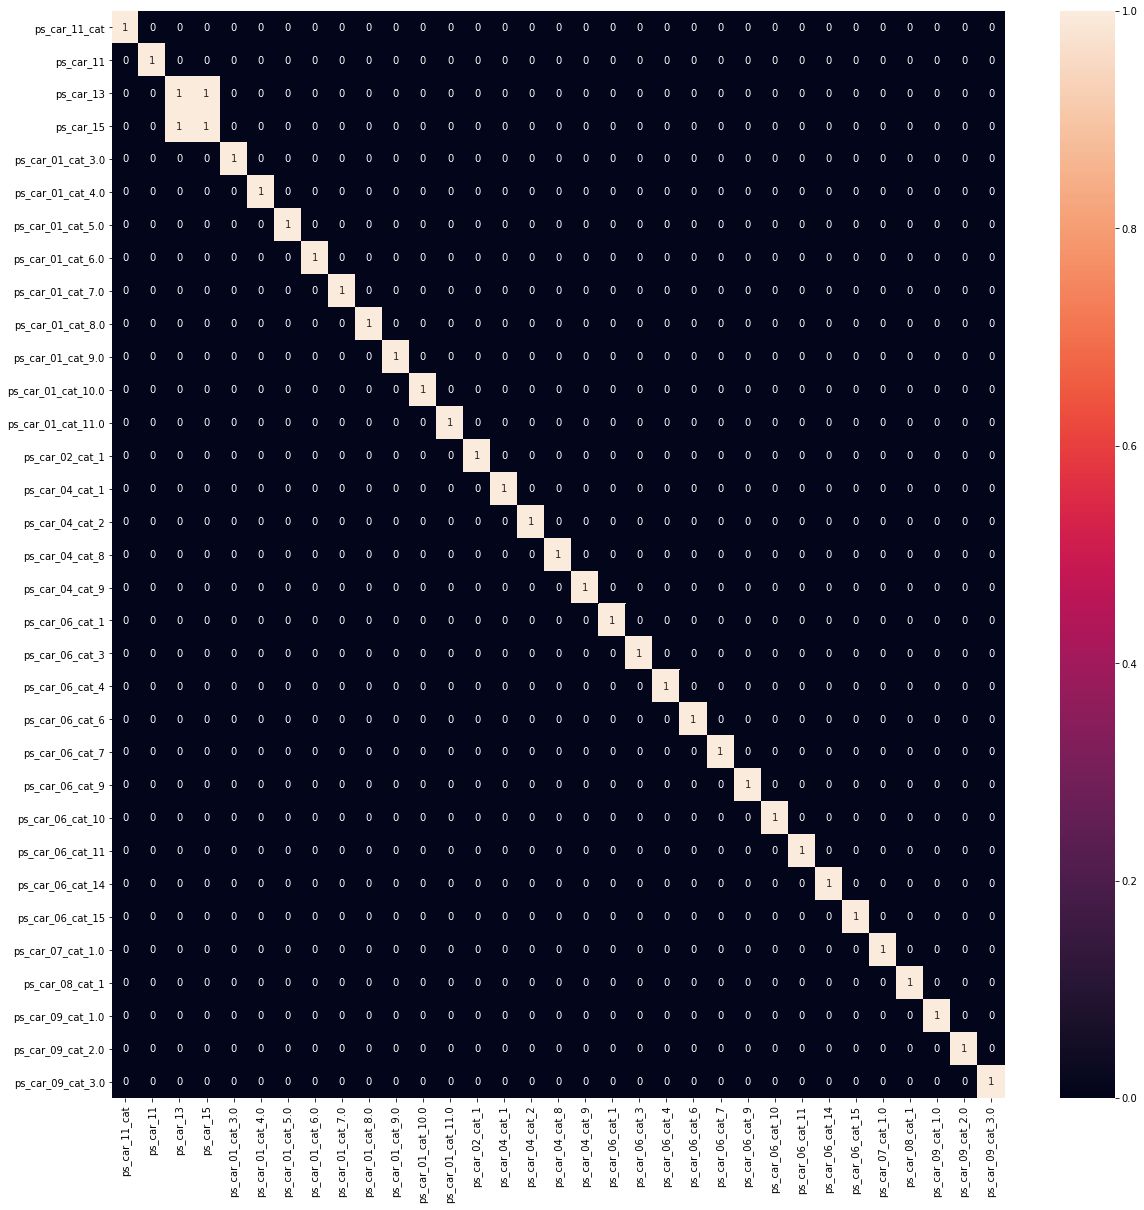

In [121]:
# Let's now find the correlation among 'car' features
features_with_car = [i for i in df_after_variance_removal.columns if 'car' in i]

plt.figure(figsize=(20,20))
sns.heatmap(df_after_variance_removal[features_with_car].corr() > 0.5, annot=True)

### As can be seen the feature "ps_car_13" and "ps_car_15" are highly correlated, so we'll remove "ps_car_15"

In [122]:
final_col.remove("ps_car_15")

final_col1.remove("ps_car_15")
final_col2.remove("ps_car_15")
final_col3.remove("ps_car_15")

In [123]:
# the final dataframe 
df_new = df_after_variance_removal[final_col]
df_new.shape

(596902, 55)

In [124]:
before_encoding_balanced = before_encoding_balanced[final_col1]
data_unbalance = data_unbalance[final_col2]
data_without_encoding = data_without_encoding[final_col3]

before_encoding_balanced.shape, data_unbalance.shape, data_without_encoding.shape

((567239, 39), (526935, 39), (526935, 39))

### Splitting X and Y

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
# For balanced data
Y = df_new['target']
X = df_new.drop('target', axis=1)

In [127]:
X.shape, Y.shape

((596902, 54), (596902,))

In [128]:
# Splitting on balanced data
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=23)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((417831, 54), (179071, 54), (417831,), (179071,))

In [129]:
# For before_encoding_balanced
Y1 = before_encoding_balanced['target']
X1 = before_encoding_balanced.drop('target', axis=1)

# Splitting
train_x1, test_x1, train_y1, test_y1 = train_test_split(X1, Y1, test_size=0.3, random_state=23)
train_x1.shape, test_x1.shape, train_y1.shape, test_y1.shape

((397067, 38), (170172, 38), (397067,), (170172,))

In [130]:
# For data_unbalance
Y2 = data_unbalance['target']
X2 = data_unbalance.drop('target', axis=1)

# Splitting 
train_x2, test_x2, train_y2, test_y2 = train_test_split(X2, Y2, test_size=0.3, random_state=23)
train_x2.shape, test_x2.shape, train_y2.shape, test_y2.shape

((368854, 38), (158081, 38), (368854,), (158081,))

In [131]:
# For data_without_encoding
Y3 = data_without_encoding['target']
X3 = data_without_encoding.drop('target', axis=1)

# Splitting 
train_x3, test_x3, train_y3, test_y3 = train_test_split(X3, Y3, test_size=0.3, random_state=23)
train_x3.shape, test_x3.shape, train_y3.shape, test_y3.shape

((368854, 38), (158081, 38), (368854,), (158081,))

### Question 17. In nominal and interval features, which features are suitable for StandardScaler?

In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
# For balanced data
scaled_x = StandardScaler().fit_transform(train_x)
scaled_test_x = StandardScaler().fit_transform(test_x)

In [134]:
# For before_encoding_balanced
scaled_x1 = StandardScaler().fit_transform(train_x1)
scaled_test_x1 = StandardScaler().fit_transform(test_x1)

# For data_unbalance
scaled_x2 = StandardScaler().fit_transform(train_x2)
scaled_test_x2 = StandardScaler().fit_transform(test_x2)


# For data_without_encoding
scaled_x3 = StandardScaler().fit_transform(train_x3)
scaled_test_x3 = StandardScaler().fit_transform(test_x3)

# Modelling

### Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [136]:
# Creating object for Logistic Regression
log2 = LogisticRegression(max_iter=1000)

# Fitting the model
logistic_model2 = log2.fit(scaled_x2, train_y2)

# Making predictions
predictions_logistic2 = logistic_model2.predict(scaled_test_x2)

In [137]:
# Confusion Matrix
confusion_matrix(test_y2, predictions_logistic2)

array([[152739,      0],
       [  5342,      0]], dtype=int64)

In [138]:
# Accuracy
ac = accuracy_score(test_y2, predictions_logistic2)
print("The accuracy is {}".format(ac))

# Precision
prec = precision_score(test_y2, predictions_logistic2)
print("The Precision is {}".format(prec))

# Recall
rec = recall_score(test_y2, predictions_logistic2)
print("The Recall is {}".format(rec))

The accuracy is 0.9662071975759262
The Precision is 0.0
The Recall is 0.0


C:\Users\Rushikesh\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Question 2. Why do you think f1-score is 0.0?

In [139]:
f1_score(test_y2, predictions_logistic2)

0.0

### Question 3. What is the precision and recall score for the model?

In [140]:
# Precision
precision_score(test_y2, predictions_logistic2)

C:\Users\Rushikesh\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [141]:
# Recall
recall_score(test_y2, predictions_logistic2)

0.0

### Question 4. What is the most important inference you can draw from the result?

#####  As can be seen from the confusion matrix we have False Negative = 5342 which is wrongly predicted as it's the number of people who shouldn't be given the insurance but with prediction they were provided. This high number for FN will lead to loss for the company so for a good model we should have High TP and High TN and low FP and FN.

### Question 5. What is the accuracy score and f1-score for the improved Logistic Regression model?

In [142]:
# Creating object for Logistic Regression
log = LogisticRegression(max_iter=1000)

# Fitting the model
logistic_model = log.fit(scaled_x, train_y)

# Making predictions
predictions_logistic = logistic_model.predict(scaled_test_x)

# Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [143]:
confusion_matrix(test_y, predictions_logistic)

array([[160567,     36],
       [  8863,   9605]], dtype=int64)

In [144]:
# Accuracy
ac = accuracy_score(test_y, predictions_logistic)
print("The accuracy is {}".format(ac))

# Precision
prec = precision_score(test_y, predictions_logistic)
print("The Precision is {}".format(prec))

# Recall
rec = recall_score(test_y, predictions_logistic)
print("The Recall is {}".format(rec))

The accuracy is 0.9503046277733413
The Precision is 0.9962659475158179
The Recall is 0.520088802252545


### Question 6. Why do you think f1-score has improved?

##### As compared to the previous model where precision and recall were both 0 but here precision = 0.9 and recal = 0.5 which has lead to an improved f1-score.

### Question 7. For model LinearSVC play with parameters – dual, max_iter and see if there is any improvement 

In [145]:
from sklearn.svm import LinearSVC

In [146]:
s= LinearSVC(dual= False, max_iter=500)
s.fit(scaled_x, train_y)

LinearSVC(dual=False, max_iter=500)

####  With dual=False, max_iter=500

In [147]:
s= LinearSVC(dual= False, max_iter=500)
s.fit(scaled_x, train_y)

LinearSVC(dual=False, max_iter=500)

In [148]:
pred_svc= s.predict(scaled_test_x)

In [149]:
accuracy_score(test_y, pred_svc)

0.9484897052007304

In [150]:
confusion_matrix(test_y, pred_svc)

array([[160603,      0],
       [  9224,   9244]], dtype=int64)

#### With dual=True, max_iter=1500 

In [151]:
#s2= LinearSVC(dual= True, max_iter=20000)
#s2.fit(scaled_x, train_y)

#pred_svc= s2.predict(scaled_test_x)

In [152]:
#accuracy_score(test_y, pred_svc)

In [153]:
#confusion_matrix(test_y, pred_svc)

### Question 8. SVC with Imbalance Check & Feature Optimization & only 100K Records → is there improvement in scores?¶

In [154]:
train_x2.shape

(368854, 38)

In [155]:
x_svc2= scaled_x2[:100000, ]
y_svc2= train_y2[:100000, ]

In [156]:
s2= LinearSVC(dual= False, max_iter=500)
s2.fit(x_svc2, y_svc2)

LinearSVC(dual=False, max_iter=500)

In [157]:
pred_svm2= s2.predict(test_x2)

In [158]:
accuracy_score(test_y2, pred_svm2)

0.9662071975759262

In [159]:
confusion_matrix(test_y2, pred_svm2)

array([[152739,      0],
       [  5342,      0]], dtype=int64)

### Question 9. XGBoost is one the better classifiers -- but still f1-score is very low. What could be the reason?

In [160]:
pip install xgboost

In [161]:
from xgboost import XGBClassifier

In [162]:
scaled_x1.shape

(397067, 38)

In [163]:
# Balanced non-encoded
xg= XGBClassifier()
xg.fit(scaled_x1, train_y1)
pred_xgb1= xg.predict(scaled_test_x1)

accuracy_score(test_y1, pred_xgb1)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:52:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.13543943774534

In [164]:
confusion_matrix(test_y1, pred_xgb1)

array([[  7248, 146889],
       [   235,  15800]], dtype=int64)

In [165]:
f1_score(test_y1, pred_xgb1)

0.17680893444640897

In [166]:
test_y1.value_counts()

0    154137
1     16035
Name: target, dtype: int64

In [167]:
pred_xgb1.tolist().count(0), pred_xgb1.tolist().count(1)

(7483, 162689)

###  Question 10. What is the increase in number of features after one-hot encoding of the data?

In [168]:
print("Number of features before applying get_dummies are: %d"%data_copied.shape[1])
print("Number of features after applying get_dummies are: %d"%dummy_df.shape[1])

Number of features before applying get_dummies are: 56
Number of features after applying get_dummies are: 102


In [169]:
print("Therefore increase in the features is {}".format(102-56))

Therefore increase in the features is 46


### Question 11. Is there any improvement in scores after encoding?

In [170]:
scaled_x.shape

(417831, 54)

In [171]:
# Balanced With encoding
xg= XGBClassifier()
xg.fit(scaled_x, train_y)
pred_xgb= xg.predict(scaled_test_x)

accuracy_score(test_y, pred_xgb)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:52:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.16979298713917942

In [172]:
confusion_matrix(test_y, pred_xgb)

array([[ 12338, 148265],
       [   401,  18067]], dtype=int64)

In [173]:
precision_score(test_y, pred_xgb)

0.1086201091792319

In [174]:
recall_score(test_y, pred_xgb)

0.9782867662984622

In [175]:
f1_score(test_y, pred_xgb)

0.19553030303030305

In [176]:
import xgboost as xgb
params = {'eta': 0.02, 'max_depth': 4, 'subsample': 0.9, 'colsample_bytree': 0.9, 
          'objective': 'binary:logistic', 'eval_metric': 'auc', 'silent': True}
d_train = xgb.DMatrix(scaled_x, train_y)
d_valid = xgb.DMatrix(scaled_test_x, test_y)
watchlist = [(d_train, 'train'), (d_valid, 'valid')]
nrounds=2500
xgb_model_log = xgb.train(params, d_train, nrounds, watchlist, early_stopping_rounds=100,
                           maximize=True, verbose_eval=100)

[12:53:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.72672	valid-auc:0.72479
[100]	train-auc:0.85282	valid-auc:0.81326
[168]	train-auc:0.86367	valid-auc:0.80523


### Question 12. If not missing a positive sample is the priority which model is best so far?


#####  Logistic regression

### Question 13. If not marking negative sample as positive is top priority, which model is best so far?


##### XG Boost 

### Question 14. Do you think using AdaBoost can give any significant improvement over XGBoost?

In [177]:
from sklearn.ensemble import AdaBoostClassifier

In [178]:
ada= AdaBoostClassifier()

In [179]:
ada.fit(scaled_x, train_y)

AdaBoostClassifier()

In [180]:
pred_ada= ada.predict(scaled_test_x)

In [181]:
accuracy_score(test_y, pred_ada)

0.949556321235711

In [182]:
confusion_matrix(test_y, pred_ada)

array([[159991,    612],
       [  8421,  10047]], dtype=int64)

### Question 15. MLPClassifier is the neural network we are trying. But how to choose the right no. of layers and size? 

In [183]:
from sklearn.neural_network import MLPClassifier

In [184]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=200, alpha=0.0001,solver='adam', verbose=1,  
                    random_state=23, tol=0.000000001, activation='relu')

In [185]:
clf.fit(scaled_x, train_y)
y_pred = clf.predict(scaled_test_x)

Iteration 1, loss = 0.17795059
Iteration 2, loss = 0.16453882
Iteration 3, loss = 0.16189484
Iteration 4, loss = 0.16009036
Iteration 5, loss = 0.15867976
Iteration 6, loss = 0.15740676
Iteration 7, loss = 0.15626835
Iteration 8, loss = 0.15522039
Iteration 9, loss = 0.15412995
Iteration 10, loss = 0.15289404
Iteration 11, loss = 0.15194130
Iteration 12, loss = 0.15075344
Iteration 13, loss = 0.14986593
Iteration 14, loss = 0.14859288
Iteration 15, loss = 0.14779491
Iteration 16, loss = 0.14637309
Iteration 17, loss = 0.14563697
Iteration 18, loss = 0.14450205
Iteration 19, loss = 0.14341743
Iteration 20, loss = 0.14255415
Iteration 21, loss = 0.14155205
Iteration 22, loss = 0.14046147
Iteration 23, loss = 0.13950693
Iteration 24, loss = 0.13861538
Iteration 25, loss = 0.13769878
Iteration 26, loss = 0.13648755
Iteration 27, loss = 0.13573701
Iteration 28, loss = 0.13528182
Iteration 29, loss = 0.13421129
Iteration 30, loss = 0.13333494
Iteration 31, loss = 0.13280519
Iteration 32, los

C:\Users\Rushikesh\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [186]:
accuracy_score(test_y, y_pred)

0.946261538719279

In [187]:
cm = confusion_matrix(test_y, y_pred)
cm

array([[157946,   2657],
       [  6966,  11502]], dtype=int64)

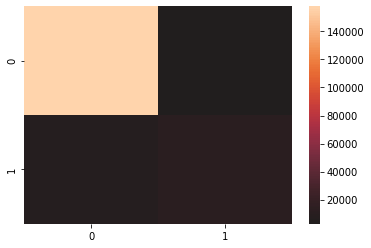

In [188]:
sns.heatmap(cm, center=True)
plt.show()

In [189]:
f1_score(test_y, y_pred)

0.7050602261930303

### Question 16. At what layer size we get the best f1-score? 

In [ ]:
for i in [100, 200, 250, 300, 350, 400, 500, 600]:
    clf = MLPClassifier(hidden_layer_sizes=(i,i,i), max_iter=300, alpha=0.0001,solver='adam', verbose=1,  
                    random_state=23, tol=0.0001, activation='relu')
    clf.fit (scaled_x, train_y)
    y_pred = clf.predict(scaled_test_x)
    
    f1 = f1_score(test_y, y_pred)
    
    print("The f1 score for {} is {}".format(i,f1))

Iteration 1, loss = 0.17795059
Iteration 2, loss = 0.16453882
Iteration 3, loss = 0.16189484
Iteration 4, loss = 0.16009036
Iteration 5, loss = 0.15867976
Iteration 6, loss = 0.15740676
Iteration 7, loss = 0.15626835
Iteration 8, loss = 0.15522039
Iteration 9, loss = 0.15412995
Iteration 10, loss = 0.15289404
Iteration 11, loss = 0.15194130
Iteration 12, loss = 0.15075344
Iteration 13, loss = 0.14986593
Iteration 14, loss = 0.14859288
Iteration 15, loss = 0.14779491
Iteration 16, loss = 0.14637309
Iteration 17, loss = 0.14563697
Iteration 18, loss = 0.14450205
Iteration 19, loss = 0.14341743
Iteration 20, loss = 0.14255415
Iteration 21, loss = 0.14155205
Iteration 22, loss = 0.14046147
Iteration 23, loss = 0.13950693
Iteration 24, loss = 0.13861538
Iteration 25, loss = 0.13769878
Iteration 26, loss = 0.13648755
Iteration 27, loss = 0.13573701
Iteration 28, loss = 0.13528182
Iteration 29, loss = 0.13421129
Iteration 30, loss = 0.13333494
Iteration 31, loss = 0.13280519
Iteration 32, los